In [1]:
# Import pandas library
import pandas as pd
pd.set_option('display.max_columns',30)
pd.set_option('display.max_rows',600)
from pandas.plotting import scatter_matrix

In [2]:
# Import numpy library
import numpy as np

In [3]:
# Import MatplotLib
import matplotlib.pyplot as plt

In [4]:
# Import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier

In [5]:
# Import seaborn
import seaborn as sns

   # Task 1: Retrieving and Preparing the Data

## 1.1 Data Retrieving

In [6]:
blood_transfusion_filename = 'transfusion.data'

In [7]:
blood_transfusion_data = pd.read_csv(blood_transfusion_filename,sep=',',decimal='.',header = 0)

In [8]:
blood_transfusion_data.shape

(748, 5)

In [9]:
blood_transfusion_data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [10]:
blood_transfusion_data.tail()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0
747,72,1,250,72,0


## 1.2 Initial Data Inspection

In [11]:
blood_transfusion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [12]:
blood_transfusion_data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


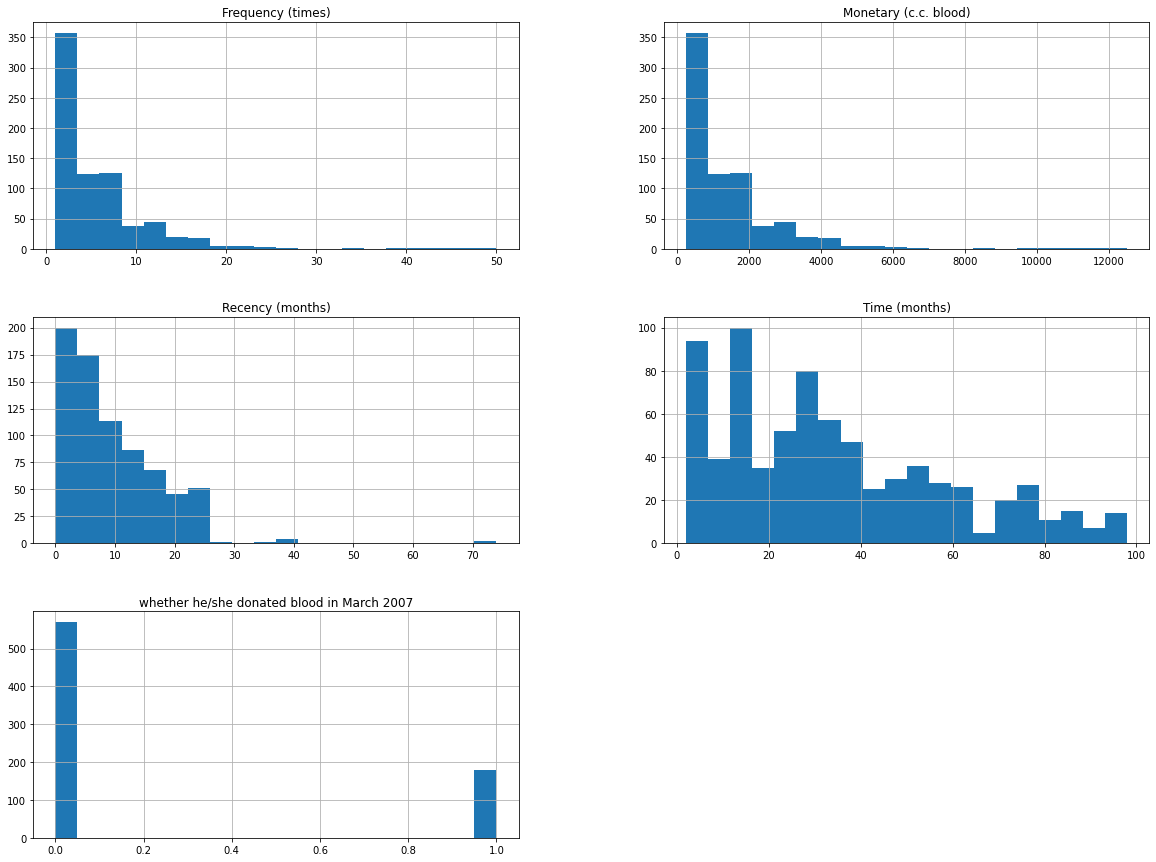

In [13]:
blood_transfusion_data.hist(bins=20,figsize=(20,15))
plt.show()

In [14]:
blood_transfusion_data['whether he/she donated blood in March 2007'].value_counts()

0    570
1    178
Name: whether he/she donated blood in March 2007, dtype: int64

In [15]:
blood_transfusion_data['whether he/she donated blood in March 2007'].value_counts()

0    570
1    178
Name: whether he/she donated blood in March 2007, dtype: int64

In [16]:
blood_transfusion_data['whether he/she donated blood in March 2007'].describe()

count    748.000000
mean       0.237968
std        0.426124
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: whether he/she donated blood in March 2007, dtype: float64

# Task 2: Data Exploration

In [17]:
corr_matrix = blood_transfusion_data.corr()

In [18]:
corr_matrix['Recency (months)'].sort_values(ascending = False)

Recency (months)                              1.000000
Time (months)                                 0.160618
Frequency (times)                            -0.182745
Monetary (c.c. blood)                        -0.182745
whether he/she donated blood in March 2007   -0.279869
Name: Recency (months), dtype: float64

In [19]:
corr_matrix['Frequency (times)'].sort_values(ascending = False)

Frequency (times)                             1.000000
Monetary (c.c. blood)                         1.000000
Time (months)                                 0.634940
whether he/she donated blood in March 2007    0.218633
Recency (months)                             -0.182745
Name: Frequency (times), dtype: float64

In [20]:
corr_matrix['Monetary (c.c. blood)'].sort_values(ascending = False)

Monetary (c.c. blood)                         1.000000
Frequency (times)                             1.000000
Time (months)                                 0.634940
whether he/she donated blood in March 2007    0.218633
Recency (months)                             -0.182745
Name: Monetary (c.c. blood), dtype: float64

In [21]:
corr_matrix['Time (months)'].sort_values(ascending = False)

Time (months)                                 1.000000
Monetary (c.c. blood)                         0.634940
Frequency (times)                             0.634940
Recency (months)                              0.160618
whether he/she donated blood in March 2007   -0.035854
Name: Time (months), dtype: float64

In [22]:
corr_matrix['whether he/she donated blood in March 2007'].sort_values(ascending = False)
# This means that there is some positive relationship between whether he/she donated blood in March 2007 with frequency and monetary

whether he/she donated blood in March 2007    1.000000
Frequency (times)                             0.218633
Monetary (c.c. blood)                         0.218633
Time (months)                                -0.035854
Recency (months)                             -0.279869
Name: whether he/she donated blood in March 2007, dtype: float64

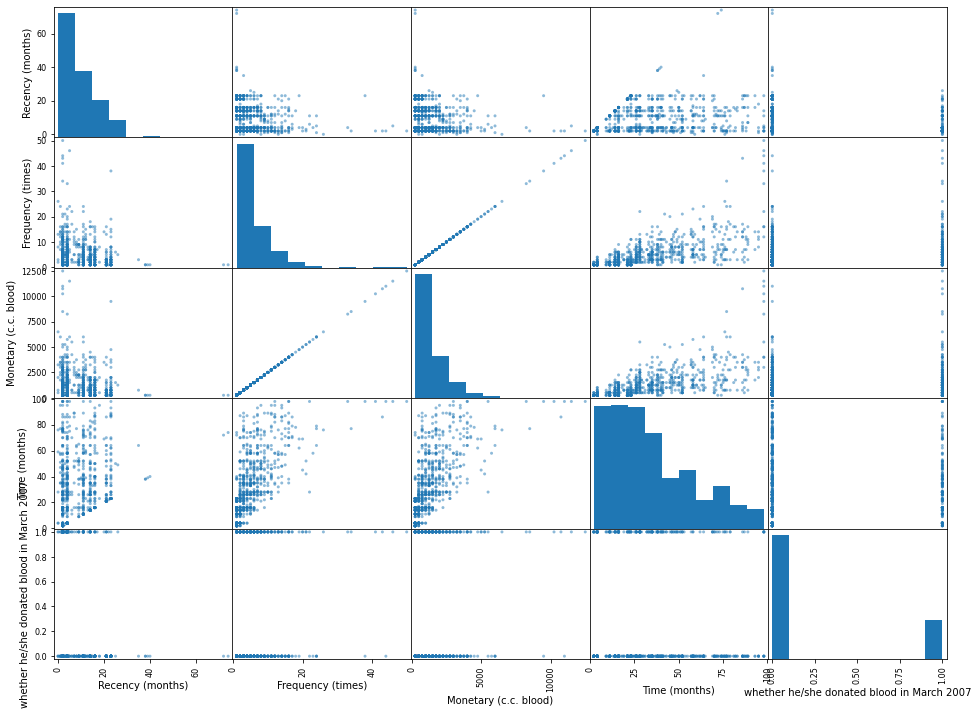

In [23]:
attributes = ["Recency (months)","Frequency (times)","Monetary (c.c. blood)","Time (months)","whether he/she donated blood in March 2007"]
scatter_matrix(blood_transfusion_data[attributes],figsize=(16,12))
plt.show()

## Task 2.1 Column Investigation

In [24]:
blood_transfusion_data['Recency (months)'].describe()

count    748.000000
mean       9.506684
std        8.095396
min        0.000000
25%        2.750000
50%        7.000000
75%       14.000000
max       74.000000
Name: Recency (months), dtype: float64

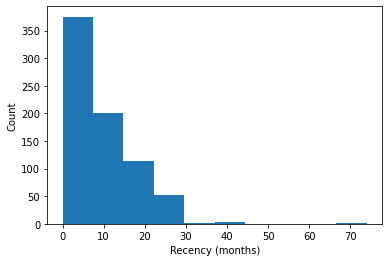

In [25]:
plt.hist(blood_transfusion_data['Recency (months)'],bins=10)
plt.xlabel('Recency (months)')
plt.ylabel('Count')
plt.show()

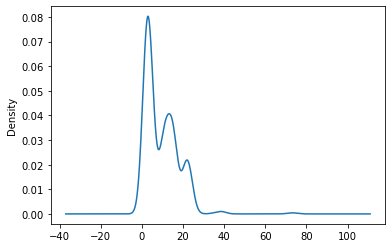

In [26]:
blood_transfusion_data['Recency (months)'].plot(kind='density')
plt.show()

In [27]:
blood_transfusion_data['Frequency (times)'].describe()

count    748.000000
mean       5.514706
std        5.839307
min        1.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       50.000000
Name: Frequency (times), dtype: float64

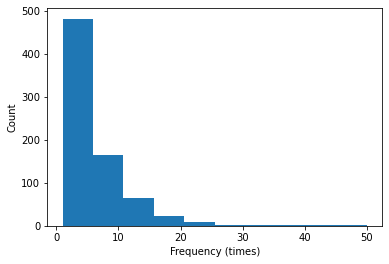

In [28]:
plt.hist(blood_transfusion_data['Frequency (times)'],bins=10)
plt.xlabel('Frequency (times)')
plt.ylabel('Count')
plt.show()

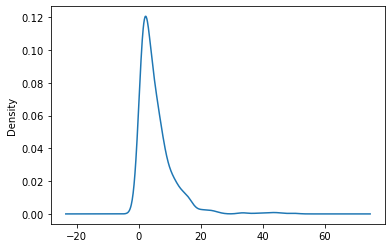

In [29]:
blood_transfusion_data['Frequency (times)'].plot(kind='density')
plt.show()

In [30]:
blood_transfusion_data['Monetary (c.c. blood)'].describe()

count      748.000000
mean      1378.676471
std       1459.826781
min        250.000000
25%        500.000000
50%       1000.000000
75%       1750.000000
max      12500.000000
Name: Monetary (c.c. blood), dtype: float64

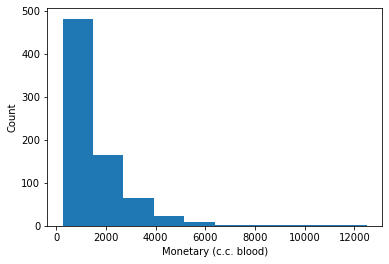

In [31]:
plt.hist(blood_transfusion_data['Monetary (c.c. blood)'],bins=10)
plt.xlabel('Monetary (c.c. blood)')
plt.ylabel('Count')
plt.show()

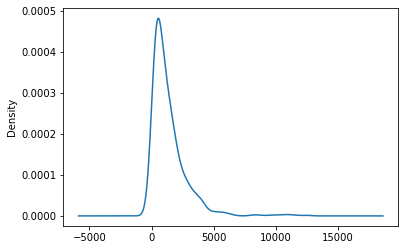

In [32]:
blood_transfusion_data['Monetary (c.c. blood)'].plot(kind='density')
plt.show()

In [33]:
blood_transfusion_data['Time (months)'].describe()

count    748.000000
mean      34.282086
std       24.376714
min        2.000000
25%       16.000000
50%       28.000000
75%       50.000000
max       98.000000
Name: Time (months), dtype: float64

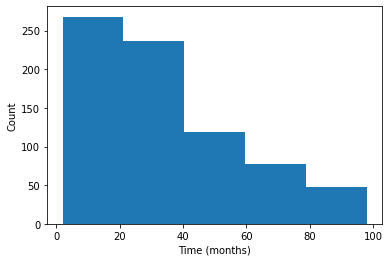

In [34]:
plt.hist(blood_transfusion_data['Time (months)'],bins=5)
plt.xlabel('Time (months)')
plt.ylabel('Count')
plt.show()

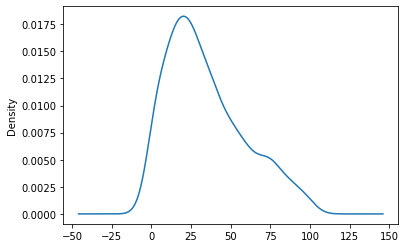

In [35]:
blood_transfusion_data['Time (months)'].plot(kind='density')
plt.show()

In [36]:
blood_transfusion_data['whether he/she donated blood in March 2007'].describe()

count    748.000000
mean       0.237968
std        0.426124
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: whether he/she donated blood in March 2007, dtype: float64

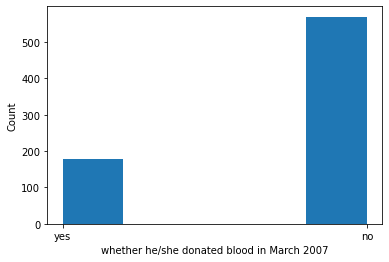

In [37]:
blood_transfusion_data['whether he/she donated blood in March 2007'].replace(to_replace=0, value='no', inplace=True)
blood_transfusion_data['whether he/she donated blood in March 2007'].replace(to_replace=1, value='yes', inplace=True)
plt.hist(blood_transfusion_data['whether he/she donated blood in March 2007'],bins=5)
plt.xlabel('whether he/she donated blood in March 2007')
plt.ylabel('Count')
plt.show()

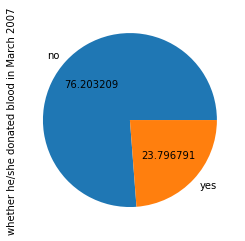

In [38]:
blood_transfusion_data['whether he/she donated blood in March 2007'].value_counts().plot(kind='pie',autopct='%2f')
plt.show()

## Task 2.2 Relationship Investigation

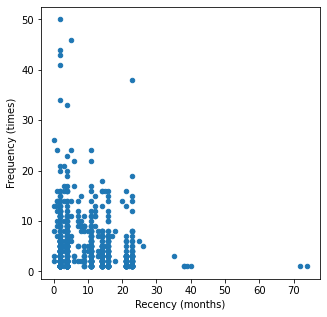

In [39]:
blood_transfusion_data.plot(kind='scatter', x='Recency (months)', y='Frequency (times)',figsize=(5,5))
plt.show()

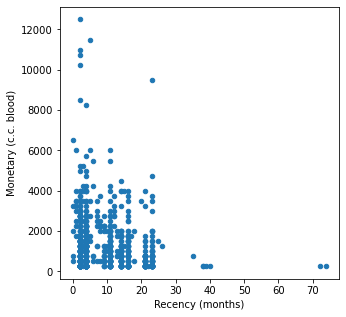

In [40]:
blood_transfusion_data.plot(kind='scatter', x='Recency (months)', y='Monetary (c.c. blood)',figsize=(5,5))
plt.show()

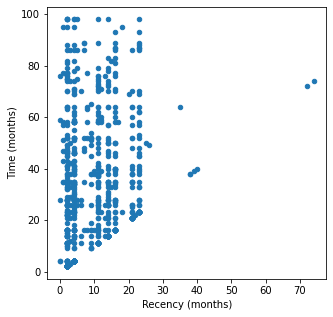

In [41]:
blood_transfusion_data.plot(kind='scatter', x='Recency (months)', y='Time (months)',figsize=(5,5))
plt.show()

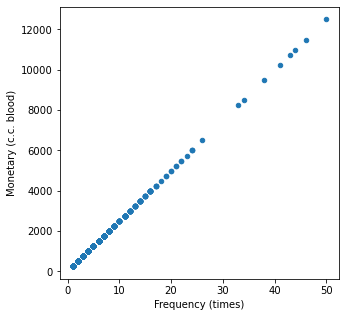

In [42]:
blood_transfusion_data.plot(kind='scatter', x='Frequency (times)', y='Monetary (c.c. blood)',figsize=(5,5))
plt.show()

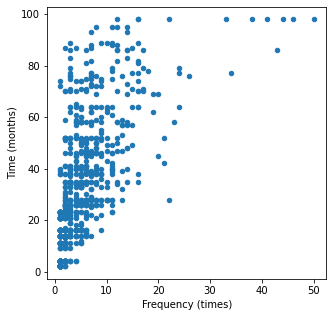

In [43]:
blood_transfusion_data.plot(kind='scatter', x='Frequency (times)', y='Time (months)',figsize=(5,5))
plt.show()

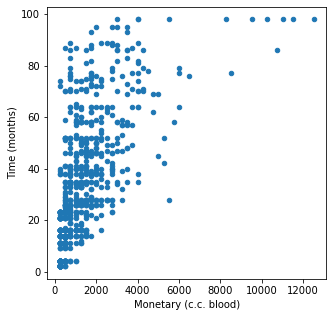

In [44]:
blood_transfusion_data.plot(kind='scatter', x='Monetary (c.c. blood)', y='Time (months)',figsize=(5,5))
plt.show()

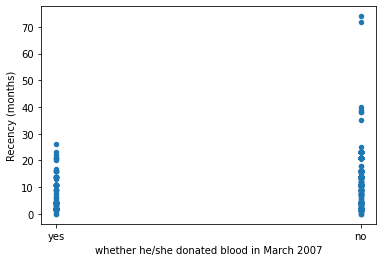

In [45]:
blood_transfusion_data.plot(kind='scatter', x='whether he/she donated blood in March 2007', y='Recency (months)')
plt.show()

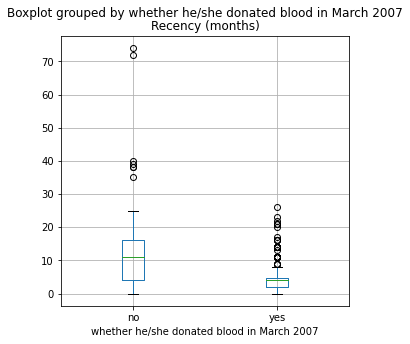

In [46]:
blood_transfusion_data.boxplot(column='Recency (months)',by = 'whether he/she donated blood in March 2007', figsize = (5,5))
plt.show()

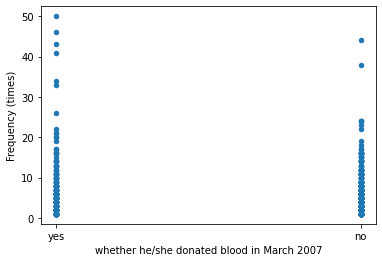

In [47]:
blood_transfusion_data.plot(kind='scatter', x='whether he/she donated blood in March 2007', y='Frequency (times)')
plt.show()

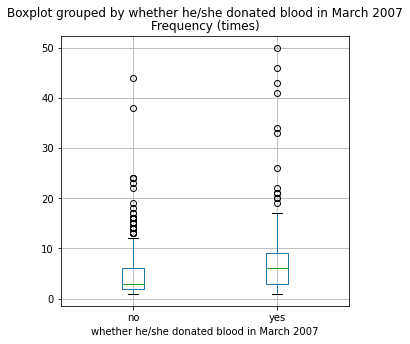

In [48]:
blood_transfusion_data.boxplot(column='Frequency (times)',by = 'whether he/she donated blood in March 2007', figsize = (5,5))
plt.show()

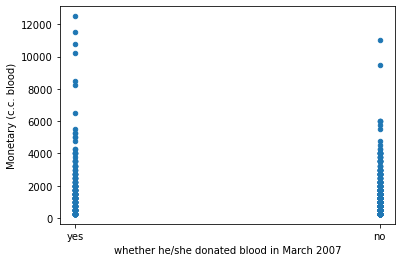

In [49]:
blood_transfusion_data.plot(kind='scatter', x='whether he/she donated blood in March 2007', y='Monetary (c.c. blood)')
plt.show()

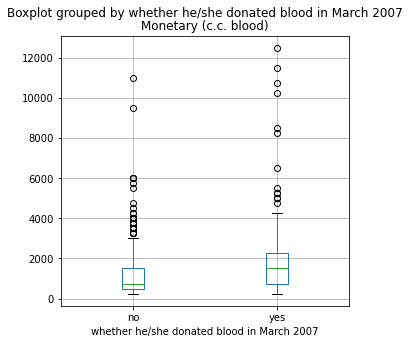

In [50]:
blood_transfusion_data.boxplot(column='Monetary (c.c. blood)',by = 'whether he/she donated blood in March 2007', figsize = (5,5))
plt.show()

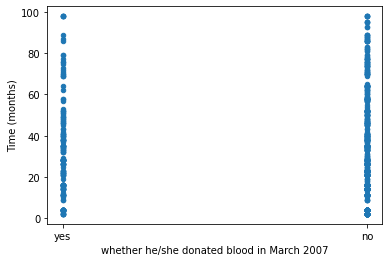

In [51]:
blood_transfusion_data.plot(kind='scatter', x='whether he/she donated blood in March 2007', y='Time (months)')
plt.show()

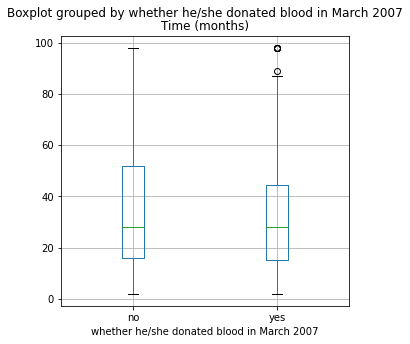

In [52]:
blood_transfusion_data.boxplot(column='Time (months)',by = 'whether he/she donated blood in March 2007', figsize = (5,5))
plt.show()

# Task 3: Data Modelling

In [53]:
features = blood_transfusion_data[['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)','whether he/she donated blood in March 2007']]
predict = 'whether he/she donated blood in March 2007'

In [54]:
X = np.array(features.drop([predict],1))
y = np.array(blood_transfusion_data[predict])

## 3.1 Model with train 80% and test 20%

## 3.1.1 kNN Classifier

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0)

In [56]:
def first_KNN(n):
    clf = KNeighborsClassifier(n_neighbors=n)
    model = clf.fit(x_train, y_train)
    return model

In [57]:
acc = 0
for k in range(1,30):
    model = first_KNN(k)
    temp_prediction = model.predict(x_test)
    temp_acc = model.score(x_test,y_test)
    if temp_acc > acc:
        acc = temp_acc
        prediction = temp_prediction
        number_of_neighbor = k
    else:
        acc = acc
print('Our highest accuracy is',acc,'at',number_of_neighbor)

Our highest accuracy is 0.7733333333333333 at 13


This is the confusion matrix: 


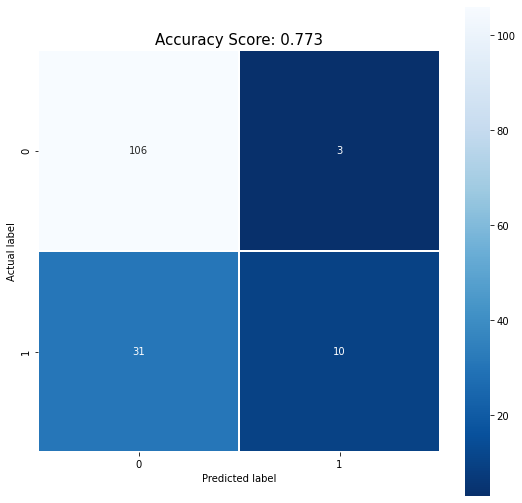

In [58]:
cm = confusion_matrix(y_test,prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(acc)
plt.title(all_sample_title, size = 15);
print('This is the confusion matrix: ')
plt.show()


In [59]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

          no       0.77      0.97      0.86       109
         yes       0.77      0.24      0.37        41

    accuracy                           0.77       150
   macro avg       0.77      0.61      0.62       150
weighted avg       0.77      0.77      0.73       150



In [60]:
col_num = X.shape[1]
cur_Max_accuracy = 0
for i in range(0,50):
    new_ind = []
    col_Ind_Random = shuffle(range(0,col_num))
    for cur_features in range(0,col_num):
        new_ind.append(col_Ind_Random[cur_features])
        newData = X[:,new_ind].copy()
        x_train, x_test, y_train, y_test = train_test_split(newData, y, test_size=0.2)
        model = first_KNN(13)
        cur_score = model.score(x_test,y_test)
        if cur_score <= cur_Max_accuracy:
            new_ind.remove(col_Ind_Random[cur_features])
        else:
            cur_Max_accuracy = cur_score
            print("Score with",features.columns[new_ind],cur_score)

Score with Index(['Monetary (c.c. blood)'], dtype='object') 0.72
Score with Index(['Monetary (c.c. blood)', 'Frequency (times)'], dtype='object') 0.7333333333333333
Score with Index(['Monetary (c.c. blood)', 'Frequency (times)', 'Recency (months)'], dtype='object') 0.8
Score with Index(['Monetary (c.c. blood)'], dtype='object') 0.8066666666666666
Score with Index(['Frequency (times)'], dtype='object') 0.8133333333333334
Score with Index(['Frequency (times)'], dtype='object') 0.8466666666666667
Score with Index(['Monetary (c.c. blood)'], dtype='object') 0.8533333333333334


## 3.1.2 Decision Tree Classifier

In [61]:
def DT(criterion_input,max_depth_input,min_sample_leaf_input,X_train,y_train):
    clf = DecisionTreeClassifier(criterion=criterion_input, max_depth=max_depth_input, min_samples_split=2, min_samples_leaf=min_sample_leaf_input, max_features=None)
    model = clf.fit(X_train, y_train)
    return model

### 3.1.2.1 Entropy

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0)

In [63]:
acc = 0
acc_colection = []
for depth in range(1,10):
    for leaf in range(1,10):
        model = DT('entropy',depth,leaf,x_train,y_train)
        temp_prediction = model.predict(x_test)
        temp_acc = model.score(x_test,y_test)
        acc_colection.append(temp_acc)
        if temp_acc > acc:
            acc = temp_acc
            prediction = temp_prediction
            number_max_depth = depth
            min_sample_leaf = leaf
        else:
            acc = acc
print('Our highest accuracy is',acc,'at max depth equal',number_max_depth,'and min sample leaf',min_sample_leaf)

Our highest accuracy is 0.7933333333333333 at max depth equal 5 and min sample leaf 9


This is the confusion matrix


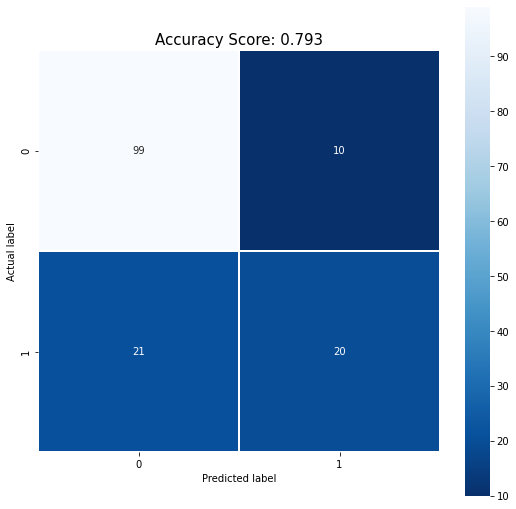

In [64]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(acc)
plt.title(all_sample_title, size = 15);
print('This is the confusion matrix')
plt.show()

In [65]:
print (classification_report(y_test, prediction))

              precision    recall  f1-score   support

          no       0.82      0.91      0.86       109
         yes       0.67      0.49      0.56        41

    accuracy                           0.79       150
   macro avg       0.75      0.70      0.71       150
weighted avg       0.78      0.79      0.78       150



### 3.1.2.2 Gini

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0)

In [67]:
acc = 0
for k in range(1,10):
    for i in range(1,10):
        model = DT('gini',k,i,x_train,y_train)
        temp_prediction = model.predict(x_test)
        temp_acc = model.score(x_test,y_test)
        if temp_acc > acc:
            acc = temp_acc
            prediction = temp_prediction
            number_max_depth = k
            min_sample_leaf = i
        else:
            acc = acc
print('Our highest accuracy is',acc,'at max depth equal',number_max_depth,'and min sample leaf',min_sample_leaf)

Our highest accuracy is 0.8 at max depth equal 9 and min sample leaf 4


This is the confusion matrix


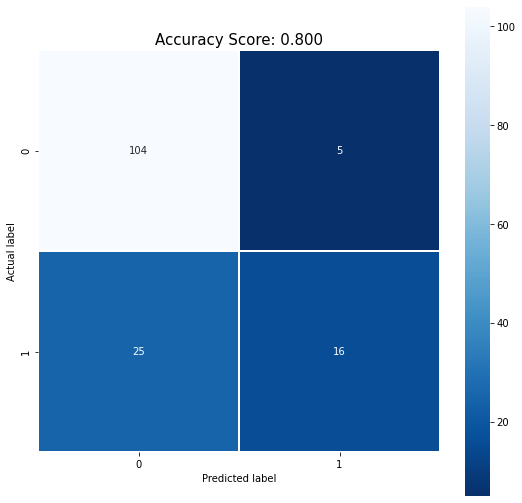

In [68]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(acc)
plt.title(all_sample_title, size = 15);
print('This is the confusion matrix')
plt.show()

In [69]:
print (classification_report(y_test, prediction))

              precision    recall  f1-score   support

          no       0.81      0.95      0.87       109
         yes       0.76      0.39      0.52        41

    accuracy                           0.80       150
   macro avg       0.78      0.67      0.70       150
weighted avg       0.79      0.80      0.78       150



## 3.2 Model with train 60% and test 40%

## 3.2.1 kNN Classifier

In [70]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state = 0)

In [71]:
def second_KNN(n):
    clf = KNeighborsClassifier(n_neighbors=n)
    model = clf.fit(x_train, y_train)
    return model

In [72]:
acc = 0
for k in range(1,30):
    model = second_KNN(k)
    temp_prediction = model.predict(x_test)
    temp_acc = model.score(x_test,y_test)
    if temp_acc > acc:
        acc = temp_acc
        prediction = temp_prediction
        number_of_neighbor = k
    else:
        acc = acc
print('Our highest accuracy is',acc,'at',number_of_neighbor)

Our highest accuracy is 0.7933333333333333 at 10


This is the confusion matrix


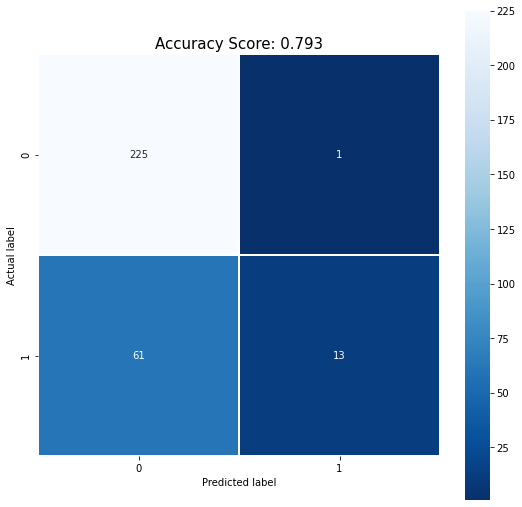

In [73]:
cm = confusion_matrix(y_test,prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(acc)
plt.title(all_sample_title, size = 15);
print('This is the confusion matrix')
plt.show()

In [74]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

          no       0.79      1.00      0.88       226
         yes       0.93      0.18      0.30        74

    accuracy                           0.79       300
   macro avg       0.86      0.59      0.59       300
weighted avg       0.82      0.79      0.73       300



In [75]:
col_num = X.shape[1]
cur_Max_accuracy = 0
for i in range(0,50):
    new_ind = []
    col_Ind_Random = shuffle(range(0,col_num))
    for cur_features in range(0,col_num):
        new_ind.append(col_Ind_Random[cur_features])
        newData = X[:,new_ind].copy()
        x_train, x_test, y_train, y_test = train_test_split(newData, y, test_size=0.4)
        model = second_KNN(10)
        cur_score = model.score(x_test,y_test)
        if cur_score <= cur_Max_accuracy:
            new_ind.remove(col_Ind_Random[cur_features])
        else:
            cur_Max_accuracy = cur_score
            print("Score with",features.columns[new_ind],cur_score)

Score with Index(['Monetary (c.c. blood)'], dtype='object') 0.7866666666666666
Score with Index(['Time (months)'], dtype='object') 0.7933333333333333
Score with Index(['Monetary (c.c. blood)'], dtype='object') 0.8


## 3.2.2 Decision Tree Classifier

### 3.2.2.1 Entropy

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state = 0)

In [77]:
acc = 0
for k in range(1,10):
    for i in range(1,10):
        model = DT('entropy',k,i,x_train,y_train)
        temp_prediction = model.predict(x_test)
        temp_acc = model.score(x_test,y_test)
        if temp_acc > acc:
            acc = temp_acc
            prediction = temp_prediction
            number_max_depth = k
            min_sample_leaf = i
        else:
            acc = acc
print('Our highest accuracy is',acc,'at max depth equal',number_max_depth,'and min sample leaf',min_sample_leaf)

Our highest accuracy is 0.81 at max depth equal 5 and min sample leaf 8


This is the confusion matrix


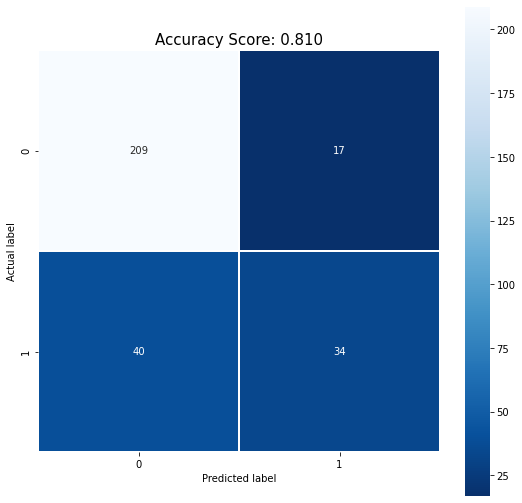

In [78]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(acc)
plt.title(all_sample_title, size = 15);
print('This is the confusion matrix')
plt.show()

In [79]:
print (classification_report(y_test, prediction))

              precision    recall  f1-score   support

          no       0.84      0.92      0.88       226
         yes       0.67      0.46      0.54        74

    accuracy                           0.81       300
   macro avg       0.75      0.69      0.71       300
weighted avg       0.80      0.81      0.80       300



### 3.2.2.1 Gini

In [80]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state = 0)

In [81]:
acc = 0
for k in range(1,10):
    for i in range(1,10):
        model = DT('gini',k,i,x_train,y_train)
        temp_prediction = model.predict(x_test)
        temp_acc = model.score(x_test,y_test)
        if temp_acc > acc:
            acc = temp_acc
            prediction = temp_prediction
            number_max_depth = k
            min_sample_leaf = i
        else:
            acc = acc
print('Our highest accuracy is',acc,'at max depth equal',number_max_depth,'and min sample leaf',min_sample_leaf)

Our highest accuracy is 0.8033333333333333 at max depth equal 4 and min sample leaf 2


This is the confusion matrix


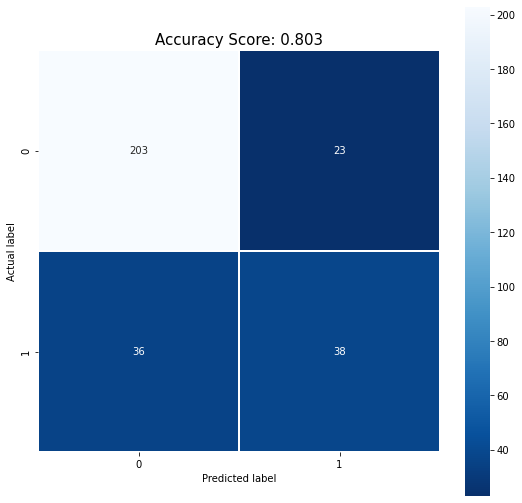

In [82]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(acc)
plt.title(all_sample_title, size = 15);
print('This is the confusion matrix')
plt.show()

In [83]:
print (classification_report(y_test, prediction))

              precision    recall  f1-score   support

          no       0.85      0.90      0.87       226
         yes       0.62      0.51      0.56        74

    accuracy                           0.80       300
   macro avg       0.74      0.71      0.72       300
weighted avg       0.79      0.80      0.80       300



## 3.3 Model with train 40% and test 60%

In [84]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.6,random_state = 0)

## 3.3.1 kNN Classifier

In [85]:
def third_KNN(n):
    clf = KNeighborsClassifier(n_neighbors=n)
    model = clf.fit(x_train, y_train)
    return model

In [86]:
acc = 0
for k in range(1,30):
    model = third_KNN(k)
    temp_prediction = model.predict(x_test)
    temp_acc = model.score(x_test,y_test)
    if temp_acc > acc:
        acc = temp_acc
        prediction = temp_prediction
        number_of_neighbor = k
    else:
        acc = acc
print('Our highest accuracy is',acc,'at',number_of_neighbor)

Our highest accuracy is 0.7661469933184856 at 26


This is the confusion matrix


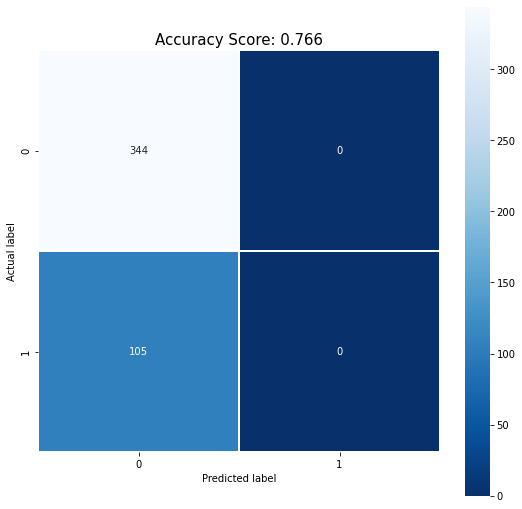

In [87]:
cm = confusion_matrix(y_test,prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(acc)
plt.title(all_sample_title, size = 15);
print('This is the confusion matrix')
plt.show()

In [88]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

          no       0.77      1.00      0.87       344
         yes       0.00      0.00      0.00       105

    accuracy                           0.77       449
   macro avg       0.38      0.50      0.43       449
weighted avg       0.59      0.77      0.66       449



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
col_num = X.shape[1]
cur_Max_accuracy = 0
for i in range(0,50):
    new_ind = []
    col_Ind_Random = shuffle(range(0,col_num))
    for cur_features in range(0,col_num):
        new_ind.append(col_Ind_Random[cur_features])
        newData = X[:,new_ind].copy()
        x_train, x_test, y_train, y_test = train_test_split(newData, y, test_size=0.6)
        model = third_KNN(26)
        cur_score = model.score(x_test,y_test)
        if cur_score <= cur_Max_accuracy:
            new_ind.remove(col_Ind_Random[cur_features])
        else:
            cur_Max_accuracy = cur_score
            print("Score with",features.columns[new_ind],cur_score)

Score with Index(['Recency (months)'], dtype='object') 0.7661469933184856
Score with Index(['Recency (months)', 'Monetary (c.c. blood)'], dtype='object') 0.7750556792873051
Score with Index(['Time (months)'], dtype='object') 0.77728285077951
Score with Index(['Frequency (times)'], dtype='object') 0.7861915367483296
Score with Index(['Monetary (c.c. blood)'], dtype='object') 0.7906458797327395
Score with Index(['Monetary (c.c. blood)'], dtype='object') 0.7951002227171492


## 3.2.3 Decision Tree Classifier

In [90]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.6,random_state = 0)

### 3.2.3.1 Entropy

In [91]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.6,random_state = 0)

In [92]:
acc = 0
for k in range(1,10):
    for i in range(1,10):
        model = DT('entropy',k,i,x_train,y_train)
        temp_prediction = model.predict(x_test)
        temp_acc = model.score(x_test,y_test)
        if temp_acc > acc:
            acc = temp_acc
            prediction = temp_prediction
            number_max_depth = k
            min_sample_leaf = i
        else:
            acc = acc
print('Our highest accuracy is',acc,'at max depth equal',number_max_depth,'and min sample leaf',min_sample_leaf)

Our highest accuracy is 0.7928730512249443 at max depth equal 4 and min sample leaf 6


This is the confusion matrix


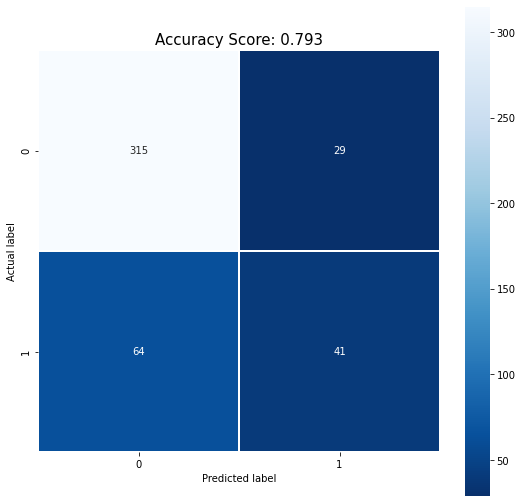

In [93]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(acc)
plt.title(all_sample_title, size = 15);
print('This is the confusion matrix')
plt.show()

In [94]:
print (classification_report(y_test, prediction))

              precision    recall  f1-score   support

          no       0.83      0.92      0.87       344
         yes       0.59      0.39      0.47       105

    accuracy                           0.79       449
   macro avg       0.71      0.65      0.67       449
weighted avg       0.77      0.79      0.78       449



### 3.2.3.2 Gini

In [95]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.6,random_state = 0)

In [96]:
acc = 0
for k in range(1,10):
    for i in range(1,10):
        model = DT('entropy',k,i,x_train,y_train)
        temp_prediction = model.predict(x_test)
        temp_acc = model.score(x_test,y_test)
        if temp_acc > acc:
            acc = temp_acc
            prediction = temp_prediction
            number_max_depth = k
            min_sample_leaf = i
        else:
            acc = acc
print('Our highest accuracy is',acc,'at max depth equal',number_max_depth,'and min sample leaf',min_sample_leaf)

Our highest accuracy is 0.7928730512249443 at max depth equal 4 and min sample leaf 6


This is the confusion matrix


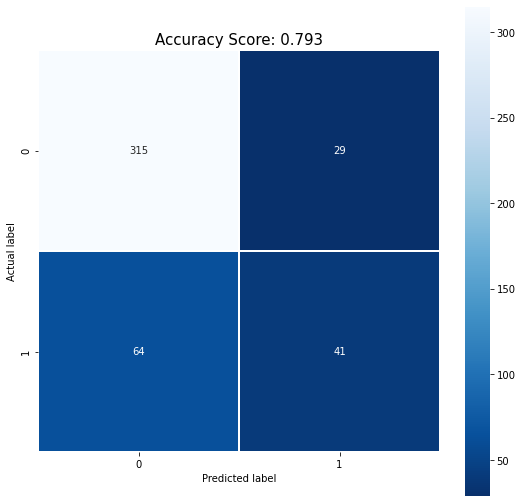

In [97]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(acc)
plt.title(all_sample_title, size = 15);
print('This is the confusion matrix')
plt.show()

In [98]:
print (classification_report(y_test, prediction))

              precision    recall  f1-score   support

          no       0.83      0.92      0.87       344
         yes       0.59      0.39      0.47       105

    accuracy                           0.79       449
   macro avg       0.71      0.65      0.67       449
weighted avg       0.77      0.79      0.78       449

